In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [5]:
feedspot = pd.read_csv("feedspot_data.csv")

In [6]:
feedspot.head()

,name,info,frequency number,frequency period,facebook fans,twitter followers
0,CNN,About Website CNN.com delivers up-to-the-minut...,3,week,2727668,33359967
1,New York Times,New York City\nAbout Website The New York Time...,168,week,1519574,40813041
2,The Huffington Post,"About Website The destination for news, blogs ...",168,week,930637,9802796
3,Fox News,U.S.A.\nAbout Website Fox News provides breaki...,168,week,1629471,17558190
4,USA TODAY,"USA TODAY HQ, McLean, Va.\nAbout Website USA T...",168,week,1507798,3272717


In [7]:
allsides = pd.read_csv("allsides.csv")

In [8]:
allsides.head()

,name,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text,website
0,ABC News,https://www.allsides.com/news-source/abc-news-...,left-center,9383,7153,1.311757,somewhat agrees,http://abcnews.go.com/
1,Al Jazeera,https://www.allsides.com/news-source/al-jazeer...,center,2358,3513,0.671221,somewhat disagrees,NaN
2,AllSides,https://www.allsides.com/news-source/allsides-0,allsides,3066,1150,2.666087,strongly agrees,http://www.allsides.com
3,AllSides Community,https://www.allsides.com/news-source/allsides-...,allsides,1984,1158,1.713299,agrees,NaN
4,AlterNet,https://www.allsides.com/news-source/alternet,left,1390,612,2.271242,strongly agrees,http://www.alternet.org/


In [9]:
nt = pd.merge(feedspot, allsides, on='name')
nt.head()


,name,info,frequency number,frequency period,facebook fans,twitter followers,allsides_page,bias,agree,disagree,agree_ratio,agreeance_text,website
0,CNN,About Website CNN.com delivers up-to-the-minut...,3,week,2727668,33359967,https://www.allsides.com/news-source/cnn-media...,left-center,23787,24523,0.969987,somewhat disagrees,http://www.cnn.com
1,New York Times,New York City\nAbout Website The New York Time...,168,week,1519574,40813041,https://www.allsides.com/news-source/new-york-...,left-center,12906,22204,0.581247,disagrees,http://www.nytimes.com/
2,The Huffington Post,"About Website The destination for news, blogs ...",168,week,930637,9802796,https://www.allsides.com/news-source/huffpost-...,left,15972,18407,0.867713,somewhat disagrees,http://www.huffingtonpost.com/
3,Fox News,U.S.A.\nAbout Website Fox News provides breaki...,168,week,1629471,17558190,https://www.allsides.com/news-source/fox-news-...,right-center,18371,27882,0.658884,disagrees,http://www.foxnews.com/
4,USA TODAY,"USA TODAY HQ, McLean, Va.\nAbout Website USA T...",168,week,1507798,3272717,https://www.allsides.com/news-source/usa-today...,center,10867,7906,1.374526,somewhat agrees,http://www.usatoday.com/


In [10]:
mergeandsort = nt[['name','bias','agree','disagree', 'agree_ratio', 'facebook fans', 'twitter followers']]
mergeandsort.head()

,name,bias,agree,disagree,agree_ratio,facebook fans,twitter followers
0,CNN,left-center,23787,24523,0.969987,2727668,33359967
1,New York Times,left-center,12906,22204,0.581247,1519574,40813041
2,The Huffington Post,left,15972,18407,0.867713,930637,9802796
3,Fox News,right-center,18371,27882,0.658884,1629471,17558190
4,USA TODAY,center,10867,7906,1.374526,1507798,3272717


In [11]:
biastypes = ['left', 'left-center', 'center', 'right-center', 'right']
mergeandsort.bias = mergeandsort.bias.astype("category", categories = biastypes)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
type(mergeandsort['facebook fans'][0])

str

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


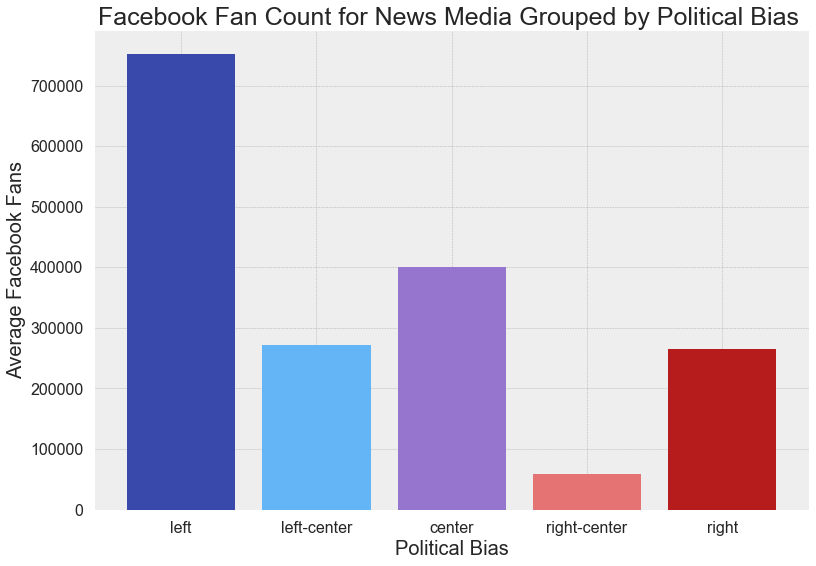

<Figure size 921.6x633.6 with 0 Axes>

In [220]:
mergeandsort['facebook fans'] = pd.to_numeric(mergeandsort['facebook fans']) #dtype changed from object to int
colors = ["#3949AB", "#64B5F6", "#9575CD", "#E57373", "#B71C1C"]
for_plot = mergeandsort[['bias','facebook fans']].groupby('bias').median().sort_values(ascending=True, by='bias')
for_plot.reset_index(inplace=True)
plt.bar(for_plot['bias'], for_plot['facebook fans'], color= colors)

#labels
plt.ylabel("Average Facebook Fans", fontsize = 20)
plt.xlabel("Political Bias", fontsize=20)

#title
plt.title("Facebook Fan Count for News Media Grouped by Political Bias ", fontsize =25)

#show plot
plt.show()

plt.savefig('./facebookfans.png', dpi=300)

In [24]:
pd.to_numeric(mergeandsort['facebook fans'])

0     2727668
1     1519574
2      930637
3     1629471
4     1507798
5      399972
6      169716
7      752719
8      593068
9      272309
10     913613
11     109282
12     424119
13     411562
14    1273009
15     285950
16     132288
17      56306
18     118058
19      59302
20      23620
21      26682
22      36068
23      15264
Name: facebook fans, dtype: int64

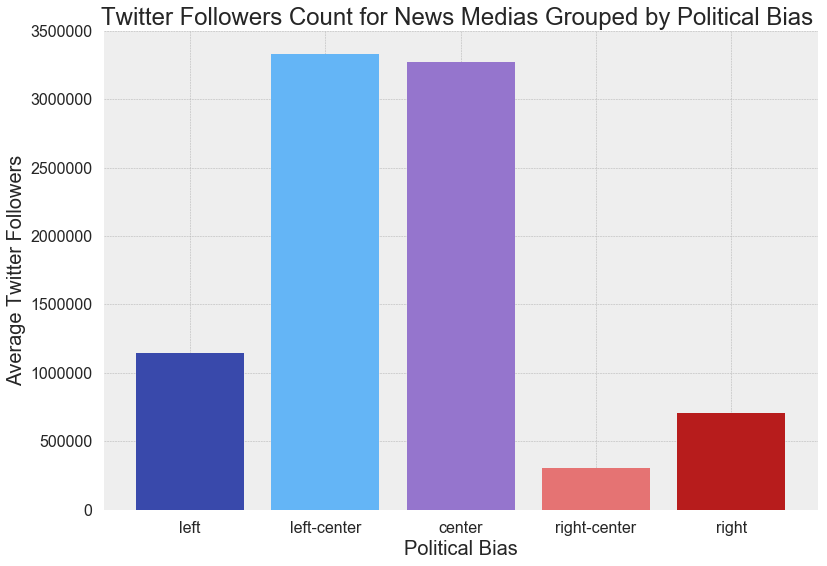

<Figure size 921.6x633.6 with 0 Axes>

In [221]:
colors = ["#3949AB", "#64B5F6", "#9575CD", "#E57373", "#B71C1C"]
for_plot = mergeandsort[['bias','twitter followers']].groupby('bias').median().sort_values(ascending=True, by='bias')
for_plot.reset_index(inplace=True)
plt.bar(for_plot['bias'], for_plot['twitter followers'], color= colors)
#labels
plt.ylabel("Average Twitter Followers", fontsize = 20)
plt.xlabel("Political Bias", fontsize = 20)

#title
plt.title("Twitter Followers Count for News Medias Grouped by Political Bias ", fontsize = 24)

#show plot
plt.show()
plt.savefig('./twitterfollowers.png', dpi=300)

In [26]:
m = mergeandsort[['bias','agree_ratio']].groupby('bias').median().sort_values(ascending=True, by='bias')
m

,agree_ratio
bias,
left,1.097353
left-center,0.778701
center,1.374526
right-center,1.261307
right,1.046305


TypeError: text() missing 3 required positional arguments: 'x', 'y', and 's'

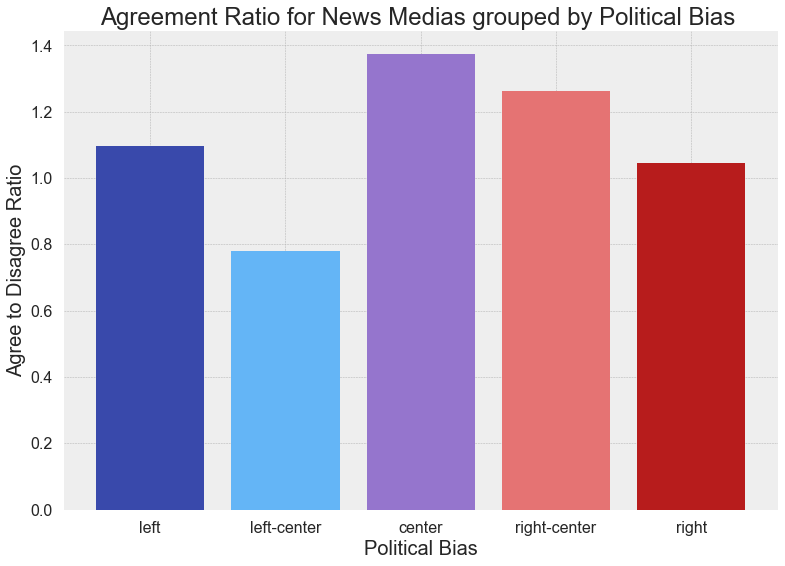

In [222]:
colors = ["#3949AB", "#64B5F6", "#9575CD", "#E57373", "#B71C1C"]
for_plot = mergeandsort[['bias','agree_ratio']].groupby('bias').median().sort_values(ascending=True, by='bias')
for_plot.reset_index(inplace=True)
plt.bar(for_plot['bias'], for_plot['agree_ratio'], color= colors)
#labels
plt.ylabel("Agree to Disagree Ratio", fontsize=20)
plt.xlabel("Political Bias",fontsize=20 )

#title
plt.title("Agreement Ratio for News Medias grouped by Political Bias ", fontsize=24)

#font size
plt.text(fontsize=20)

#show plot
plt.show()
plt.savefig('./agreementratio.png', dpi=300)

In [85]:
for_plot.reset_index()

,index,bias,agree_ratio
0,0,left,1.097353
1,1,left-center,0.778701
2,2,center,1.374526
3,3,right-center,1.261307
4,4,right,1.046305


In [86]:
mergeandsort.plot

In [87]:
mergeandsort['total votes'] = mergeandsort['agree'] + mergeandsort['disagree'] 
mergeandsort.sort_values('total votes', ascending = False, inplace = True)
#mergeandsort = mergeandsort.drop(columns = ['total_votes'])
mergeandsort.head()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,bias,agree,disagree,agree_ratio,facebook fans,twitter followers,total votes
0,CNN,left-center,23787,24523,0.969987,2727668,33359967,48310
3,Fox News,right-center,18371,27882,0.658884,1629471,17558190,46253
1,New York Times,left-center,12906,22204,0.581247,1519574,40813041,35110
2,The Huffington Post,left,15972,18407,0.867713,930637,9802796,34379
6,Politico,left-center,11554,19082,0.605492,169716,3330418,30636


In [88]:
mergeandsort

,name,bias,agree,disagree,agree_ratio,facebook fans,twitter followers,total votes
0,CNN,left-center,23787,24523,0.969987,2727668,33359967,48310
3,Fox News,right-center,18371,27882,0.658884,1629471,17558190,46253
1,New York Times,left-center,12906,22204,0.581247,1519574,40813041,35110
2,The Huffington Post,left,15972,18407,0.867713,930637,9802796,34379
6,Politico,left-center,11554,19082,0.605492,169716,3330418,30636
19,The Washington Times,right-center,19316,9616,2.008735,59302,304848,28932
8,NPR News,center,16489,11427,1.442986,593068,6888064,27916
4,USA TODAY,center,10867,7906,1.374526,1507798,3272717,18773
14,ABC News,left-center,9383,7153,1.311757,1273009,46588,16536
18,Newsmax,right,5753,7786,0.738890,118058,68177,13539


In [89]:
type(int(mergeandsort['facebook fans'][0]))
for i in range(len(mergeandsort)):
    mergeandsort['facebook fans'][i] = int(mergeandsort['facebook fans'][i])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
type(mergeandsort['facebook fans'][0])

numpy.int64

In [91]:
mergeandsort['total social media'] = mergeandsort['facebook fans'] + mergeandsort['twitter followers']
mergeandsort.sort_values('total social media', ascending = False, inplace = True)
mergeandsort.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,bias,agree,disagree,agree_ratio,facebook fans,twitter followers,total votes,total social media
1,New York Times,left-center,12906,22204,0.581247,1519574,40813041,35110,42332615
0,CNN,left-center,23787,24523,0.969987,2727668,33359967,48310,36087635
5,Reuters,center,4675,3280,1.425305,399972,19577136,7955,19977108
3,Fox News,right-center,18371,27882,0.658884,1629471,17558190,46253,19187661
2,The Huffington Post,left,15972,18407,0.867713,930637,9802796,34379,10733433


In [92]:
from math import *
tc = mergeandsort [['total votes','total social media']]

test = tc.copy()
test['log'] = 0.
for i in range(len(test)):
    test['log'][i] = log(test['total votes'][i])
test

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,total votes,total social media,log
1,35110,42332615,10.466241
0,48310,36087635,10.785394
5,7955,19977108,8.981556
3,46253,19187661,10.741882
2,34379,10733433,10.445201
8,27916,7481132,10.236955
12,8469,6102385,9.044168
10,7020,5517531,8.856518
4,18773,4780515,9.840175
16,3424,3533482,8.138565


In [151]:
#plt.scatter(test['total votes'],tc['total social media'])
#plt.plot(tc)
#plt.ylabel('Total Votes')
#plt.xlabel('Total Social Media Interactions')
#plt.xticks(fontsize=4)
#plt.figure(figsize=(10,10))

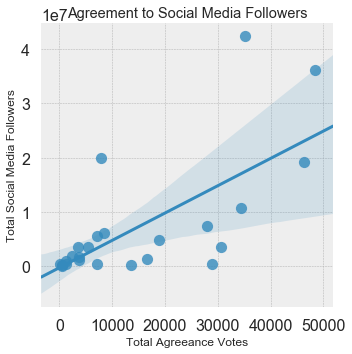

In [223]:
import seaborn as sns
ax = sns.lmplot('total votes','total social media', tc)
ax.set(xlabel='Total Agreeance Votes', ylabel='Total Social Media Followers')
ax = plt.gca()
ax.set_title("Agreement to Social Media Followers", fontsize = 14.5)
plt.savefig('./regression.png', dpi=300)

In [95]:
biasvalues = mergeandsort.replace({'bias': {'left': '1',
                                'left-center': '2', 'center': '3', 'right-center': '4', 'right':'5'}})
biasvalues['bias']=biasvalues['bias'].astype('int64')
biasvalues['facebook fans']=biasvalues['facebook fans'].astype('int64')
biasvalues['twitter followers']=biasvalues['twitter followers'].astype('int64')

In [96]:
mergeandsort['bias'] = pd.Categorical(mergeandsort['bias'], categories=['left', 'left-center', 'center', 'right-center', 'right'], ordered = True)
mergeandsort.sort_values('bias',inplace=True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [97]:
mergeandsort

,name,bias,agree,disagree,agree_ratio,facebook fans,twitter followers,total votes,total social media
2,The Huffington Post,left,15972,18407,0.867713,930637,9802796,34379,10733433
15,New York Daily News,left,860,342,2.514620,285950,657288,1202,943238
7,Yahoo! News,left,1285,1171,1.097353,752719,1140954,2456,1893673
1,New York Times,left-center,12906,22204,0.581247,1519574,40813041,35110,42332615
11,NBC,left-center,3037,3983,0.762491,109282,265379,7020,374661
20,The Philadelphia Inquirer,left-center,34,50,0.680000,23620,377312,84,400932
22,Chicago Sun-Times,left-center,592,582,1.017182,36068,388236,1174,424304
14,ABC News,left-center,9383,7153,1.311757,1273009,46588,16536,1319597
9,Los Angeles Times,left-center,3072,2428,1.265239,272309,3236784,5500,3509093
6,Politico,left-center,11554,19082,0.605492,169716,3330418,30636,3500134


In [98]:
mergeandsort

,name,bias,agree,disagree,agree_ratio,facebook fans,twitter followers,total votes,total social media
2,The Huffington Post,left,15972,18407,0.867713,930637,9802796,34379,10733433
15,New York Daily News,left,860,342,2.514620,285950,657288,1202,943238
7,Yahoo! News,left,1285,1171,1.097353,752719,1140954,2456,1893673
1,New York Times,left-center,12906,22204,0.581247,1519574,40813041,35110,42332615
11,NBC,left-center,3037,3983,0.762491,109282,265379,7020,374661
20,The Philadelphia Inquirer,left-center,34,50,0.680000,23620,377312,84,400932
22,Chicago Sun-Times,left-center,592,582,1.017182,36068,388236,1174,424304
14,ABC News,left-center,9383,7153,1.311757,1273009,46588,16536,1319597
9,Los Angeles Times,left-center,3072,2428,1.265239,272309,3236784,5500,3509093
6,Politico,left-center,11554,19082,0.605492,169716,3330418,30636,3500134


In [99]:
mergeandsort

,name,bias,agree,disagree,agree_ratio,facebook fans,twitter followers,total votes,total social media
2,The Huffington Post,left,15972,18407,0.867713,930637,9802796,34379,10733433
15,New York Daily News,left,860,342,2.514620,285950,657288,1202,943238
7,Yahoo! News,left,1285,1171,1.097353,752719,1140954,2456,1893673
1,New York Times,left-center,12906,22204,0.581247,1519574,40813041,35110,42332615
11,NBC,left-center,3037,3983,0.762491,109282,265379,7020,374661
20,The Philadelphia Inquirer,left-center,34,50,0.680000,23620,377312,84,400932
22,Chicago Sun-Times,left-center,592,582,1.017182,36068,388236,1174,424304
14,ABC News,left-center,9383,7153,1.311757,1273009,46588,16536,1319597
9,Los Angeles Times,left-center,3072,2428,1.265239,272309,3236784,5500,3509093
6,Politico,left-center,11554,19082,0.605492,169716,3330418,30636,3500134


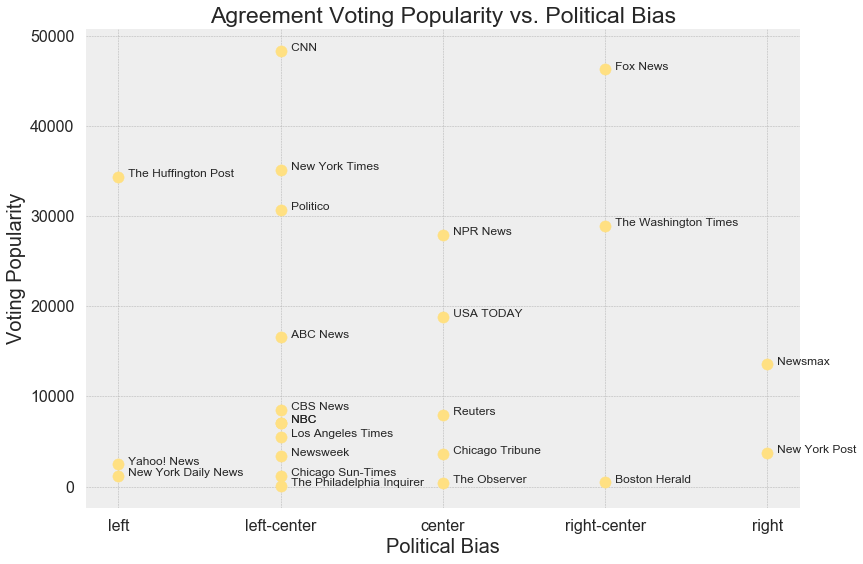

In [219]:
plt.scatter(mergeandsort['bias'], mergeandsort['total votes'], color = '#FFE082' )

for i in range(mergeandsort.shape[0]):
    x = mergeandsort.iloc[i, 1]
    y = mergeandsort.iloc[i, 7]
    text = "   " + mergeandsort.iloc[i, 0]
    
    plt.text(x, y, text, fontsize=12)
    plt.xlabel('Political Bias', fontsize = 20 )
    plt.ylabel('Voting Popularity', fontsize = 20)
    plt.title("Agreement Voting Popularity vs. Political Bias", fontsize = 23)
    plt.savefig('./scatter.png', dpi=300)



In [122]:
allsides.columns

Index(['name', 'allsides_page', 'bias', 'agree', 'disagree', 'agree_ratio',
       'agreeance_text', 'website'],
      dtype='object')

In [123]:
feedspot.columns

Index(['name', 'info', 'frequency number', 'frequency period', 'facebook fans',
       'twitter followers'],
      dtype='object')

In [124]:
new_allsides = allsides[['name','bias','agree','disagree']]
new_allsides.head()

,name,bias,agree,disagree
0,ABC News,left-center,9383,7153
1,Al Jazeera,center,2358,3513
2,AllSides,allsides,3066,1150
3,AllSides Community,allsides,1984,1158
4,AlterNet,left,1390,612


In [125]:
for i in range(mergeandsort.shape[0]):
    x = mergeandsort.iloc[i, 1]
    y = mergeandsort.iloc[i, ]
    print(x)
    print(y)

left
name                  The Huffington Post
bias                                 left
agree                               15972
disagree                            18407
agree_ratio                      0.867713
facebook fans                      930637
twitter followers                 9802796
total votes                         34379
total social media               10733433
Name: 2, dtype: object
left
name                  New York Daily News
bias                                 left
agree                                 860
disagree                              342
agree_ratio                       2.51462
facebook fans                      285950
twitter followers                  657288
total votes                          1202
total social media                 943238
Name: 15, dtype: object
left
name                  Yahoo! News
bias                         left
agree                        1285
disagree                     1171
agree_ratio               1.09735
facebook fan

In [126]:
newfeedspot = feedspot[['name','frequency number','frequency period','facebook fans', 'twitter followers']]
newfeedspot.head()

,name,frequency number,frequency period,facebook fans,twitter followers
0,CNN,3,week,2727668,33359967
1,New York Times,168,week,1519574,40813041
2,The Huffington Post,168,week,930637,9802796
3,Fox News,168,week,1629471,17558190
4,USA TODAY,168,week,1507798,3272717


In [127]:
len(mergeandsort)

24

In [128]:
allsides.groupby(['bias']).groups.keys()

dict_keys(['allsides', 'center', 'left', 'left-center', 'right', 'right-center'])

In [129]:
allsides.groupby(['bias'])

In [130]:
print(type(allsides))

<class 'pandas.core.frame.DataFrame'>


In [131]:
biasgroup = allsides.groupby('bias')

In [132]:
print(type(biasgroup))

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [133]:
biasgroup.size()

bias
allsides         8
center          82
left            47
left-center     62
right           40
right-center    28
dtype: int64

In [134]:
for key, values in biasgroup:
    print(key)

allsides
center
left
left-center
right
right-center


In [135]:
Things to achieve:
    allsides 
    1) graph by political biases
    2) graph by the top agreed on 
    feedspot
    1) match/concanate name to allsides
    2) graph the top 50

SyntaxError: invalid syntax (<ipython-input-135-b7e6120541ce>, line 1)

In [136]:
leftgroup = new_allsides[new_allsides['bias'] == 'left']

In [137]:
leftgroup.head()

,name,bias,agree,disagree
4,AlterNet,left,1390,612
7,Aquinas College Saint,left,723,441
8,Arkansas Democrat-Gazette,left,772,575
17,Blue Virginia,left,593,433
18,Boing Boing,left,707,455


In [138]:
rightgroup = new_allsides[new_allsides['bias'] == 'right']
rightgroup.head()

,name,bias,agree,disagree
5,American Spectator,right,4837,2068
6,American Thinker,right,1237,673
15,Bearing Drift,right,486,411
22,Breitbart News,right,12237,6686
30,CBN,right,4979,2688


In [139]:
centergroup = new_allsides[new_allsides['bias'] == 'center']
centergroup.head()

,name,bias,agree,disagree
1,Al Jazeera,center,2358,3513
9,Associated Press,center,4995,3554
12,Axios,center,706,822
13,Barnstable Patriot,center,392,467
14,BBC News,center,7798,7444


In [140]:
leftcentergroup = new_allsides[new_allsides['bias'] == 'left-center']
leftcentergroup.head()

,name,bias,agree,disagree
0,ABC News,left-center,9383,7153
10,Atlanta Journal-Constitution,left-center,668,637
11,Austin American-Statesman,left-center,612,462
21,Bowling Green Daily News,left-center,465,483
24,Bustle,left-center,614,624


In [141]:
rightcentergroup = new_allsides[new_allsides['bias'] == 'right-center']
rightcentergroup.head()

,name,bias,agree,disagree
19,Boston Herald,right-center,251,199
20,Boston Herald Editorial,right-center,125,95
57,Daily Press,right-center,261,348
62,Deseret News,right-center,950,1464
64,Drudge Report,right-center,1701,1040


In [142]:
new_allsides['total_votes'] = new_allsides['agree'] + new_allsides['disagree'] #pull the ones with most votes
new_allsides.sort_values('total_votes', ascending = False, inplace = True)
new_allsides

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,bias,agree,disagree,total_votes
40,CNN,left-center,23787,24523,48310
78,Fox News,right-center,18371,27882,46253
136,New York Times,left-center,12906,22204,35110
256,Washington Post,left-center,21909,13159,35068
89,The Huffington Post,left,15972,18407,34379
151,Politico,left-center,11554,19082,30636
257,The Washington Times,right-center,19316,9616,28932
142,NPR News,center,16489,11427,27916
251,Wall Street Journal - News,center,10346,16163,26509
238,Townhall,right,7925,12829,20754


In [143]:
as2 = new_allsides.head(20).copy() #getting the top 50 
as2.head()

,name,bias,agree,disagree,total_votes
40,CNN,left-center,23787,24523,48310
78,Fox News,right-center,18371,27882,46253
136,New York Times,left-center,12906,22204,35110
256,Washington Post,left-center,21909,13159,35068
89,The Huffington Post,left,15972,18407,34379


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


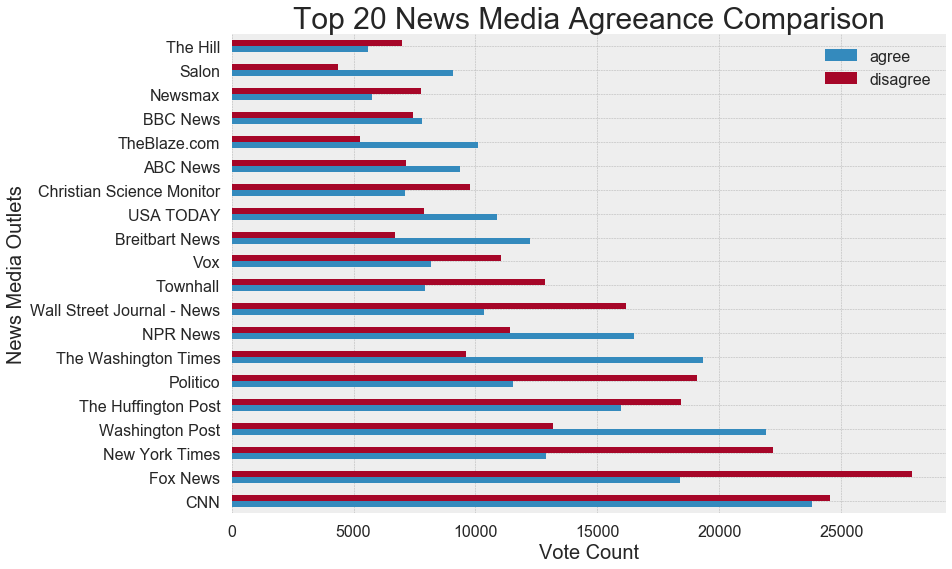

In [224]:
plt.style.use('bmh')
for_plot = as2.set_index('name')

for_plot[['agree', 'disagree']].plot(kind='barh')

plt.xlabel('Vote Count', fontsize = 20 )
plt.ylabel('News Media Outlets', fontsize = 20)
plt.title("Top 20 News Media Agreeance Comparison", fontsize = 30)

ax1 = plt.axes()
#ax1.yaxis.set_label_text('')
plt.savefig('./top20.png', dpi=300)

TypeError: text() missing 3 required positional arguments: 'x', 'y', and 's'

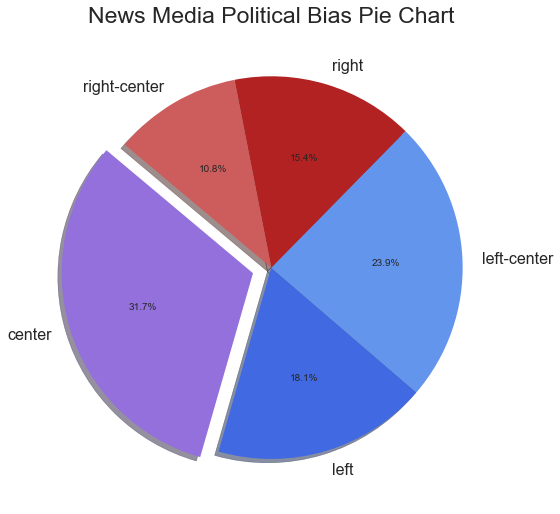

In [225]:
colors = ["#64B5F6", "#9575CD", "#3949AB", "#E57373", "#B71C1C"]
labels = 'center', 'left', 'left-center', 'right', 'right-center'
sizes = [82, 47, 62, 40, 28]
colors = ['mediumpurple', 'royalblue', 'cornflowerblue', 'firebrick', 'indianred']
explode = (0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("News Media Political Bias Pie Chart", fontsize = 23)
plt.text(fontsize=20)

plt.axis('equal')
plt.savefig('./pie.png', dpi=300)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


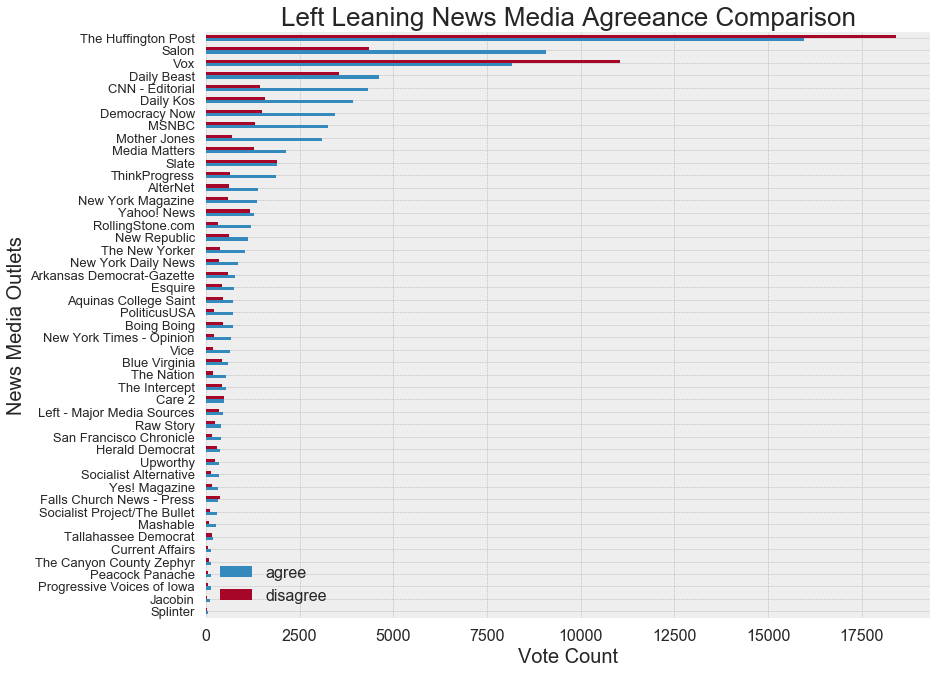

<Figure size 921.6x633.6 with 0 Axes>

In [231]:
plt.style.use('bmh')
for_plot = leftgroup.set_index('name')

for_plot[['agree', 'disagree']].sort_values(by=['agree'], ascending=True).plot(kind='barh')

ax1 = plt.axes()
ax1.yaxis.set_label_text('')
plt.yticks(fontsize=13)

plt.tight_layout()
plt.savefig('./leftagree.png', dpi=300)

plt.xlabel('Vote Count', fontsize = 20 )
plt.ylabel('News Media Outlets', fontsize = 20)
plt.title("Left Leaning News Media Agreeance Comparison", fontsize = 26)

plt.show()
plt.savefig('./leftagree.png', dpi=300)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


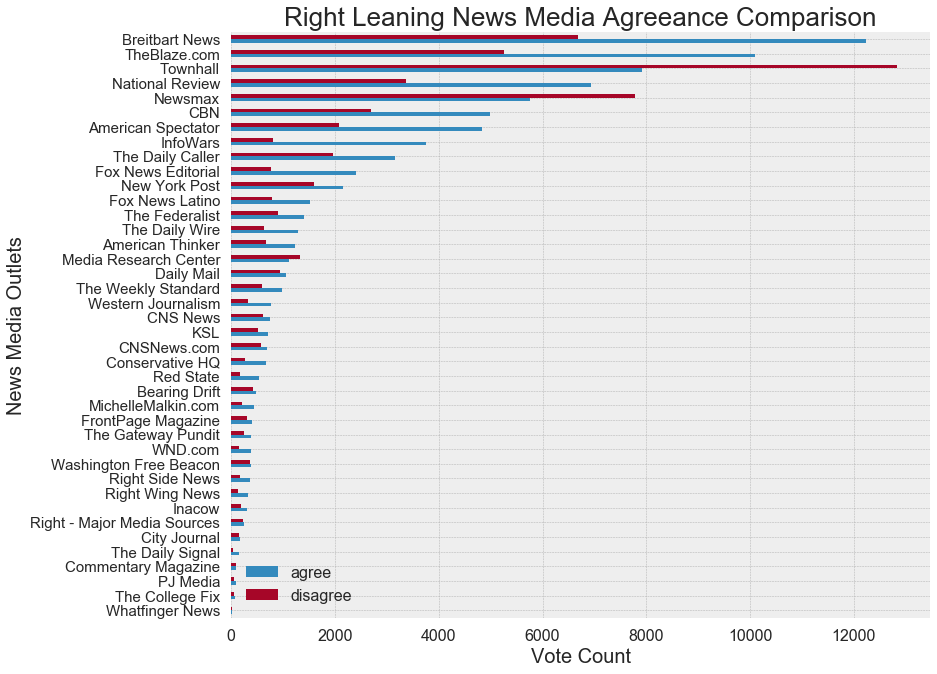

In [230]:
plt.style.use('bmh')
for_plot = rightgroup.set_index('name')

for_plot[['agree', 'disagree']].sort_values(by=['agree'], ascending=True).plot(kind='barh')

ax1 = plt.axes()
ax1.yaxis.set_label_text('')
plt.yticks(fontsize=15)
plt.tight_layout()
#plt.savefig('./rightagree.png', dpi=300)
plt.xlabel('Vote Count', fontsize = 20 )
plt.ylabel('News Media Outlets', fontsize = 20)
plt.title("Right Leaning News Media Agreeance Comparison", fontsize = 26)
plt.savefig('./rightleaning.png', dpi=300)